# Introduction

1. [Load and Check Data](#1)
2. [Variable Description](#2)
3. [Univarite Variable Analysis](#3)
    * [Categorical Variable Analysis](#4)
    * [Numerical Variable Analysis](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Matris](#12)
    * [Sibsp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Age -- Survived](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32)
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)








In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id = "1"></a><br>
# Load and Check Data

In [156]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [157]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [158]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
# Variable Description
1. PassengerId 
2. Survived
3. Pclass 
4. Name 
5. Sex
6. Age 
7. SibSp
8. Parch 
9. Ticket 
10. Fare 
11. Cabin 
12. Embarked

In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id = "3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

<a id = "4"></a><br>
## Categorical Variable

In [161]:
def bar_plot(variable):
    var = train_df[variable]
    varValue = var.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

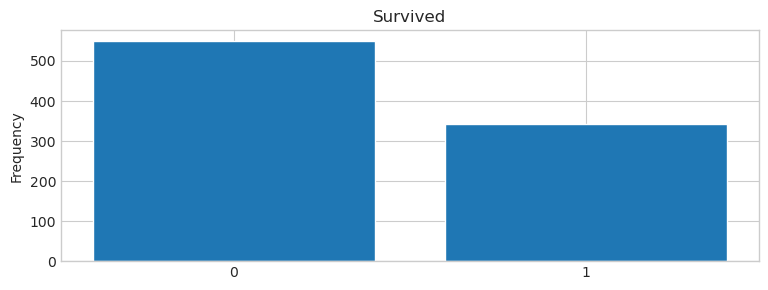

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


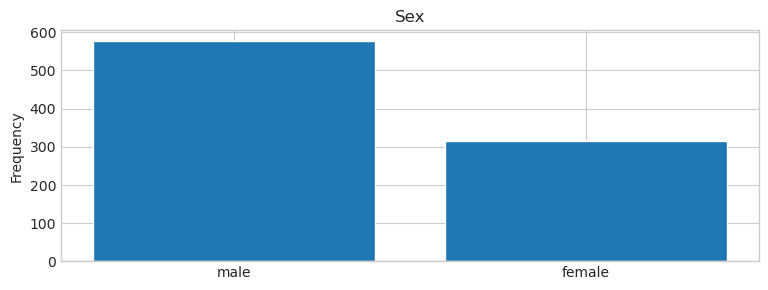

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


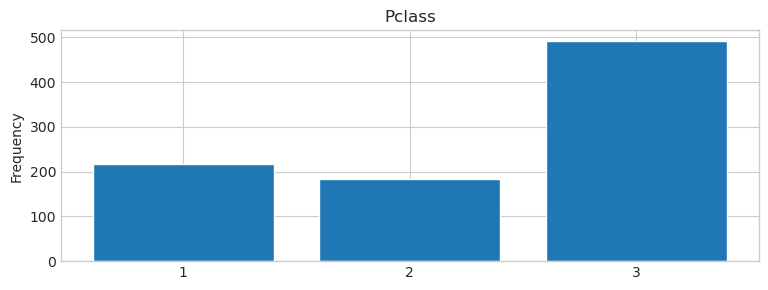

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


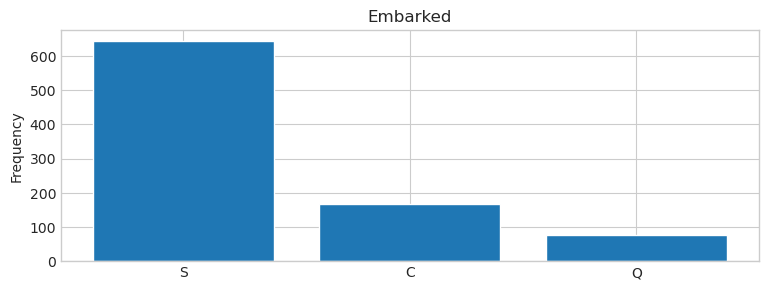

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


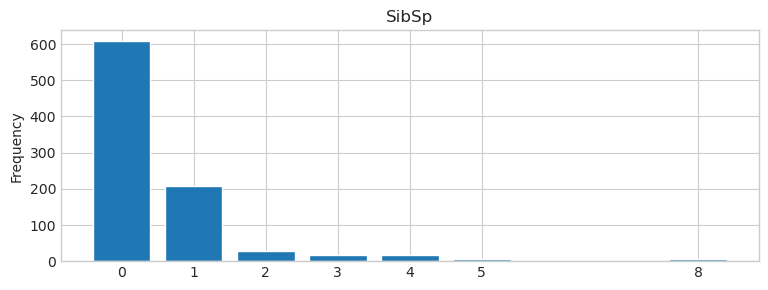

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


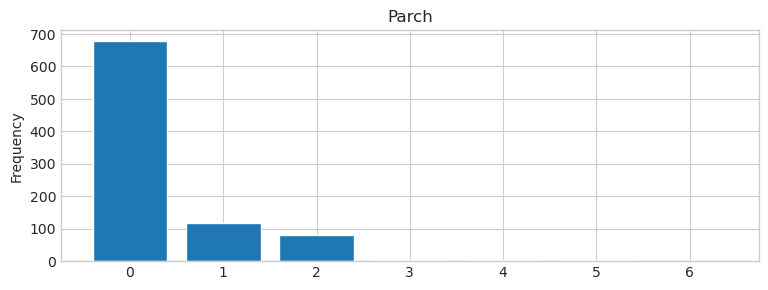

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [162]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [163]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n ".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 
 
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 
 
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 
 


<a id = "5"></a><br>
## Numerical Variable

In [164]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

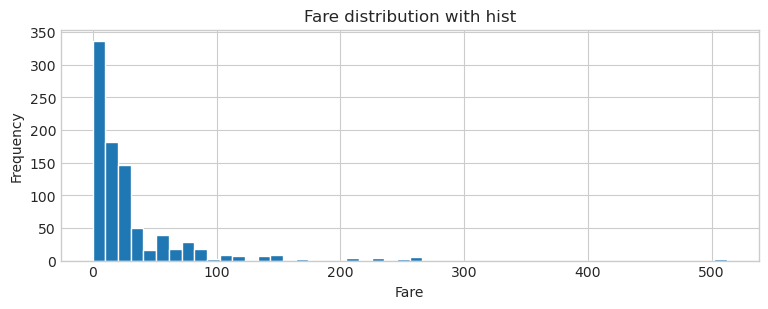

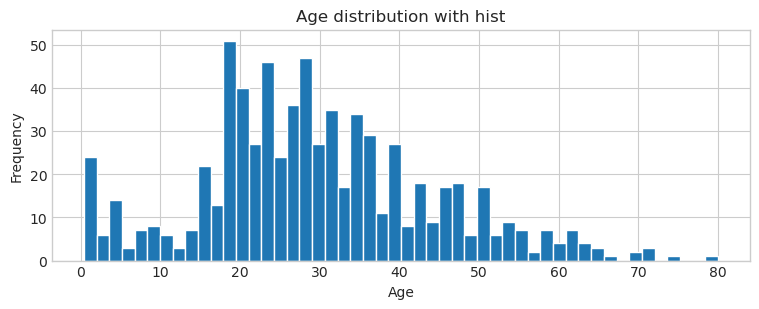

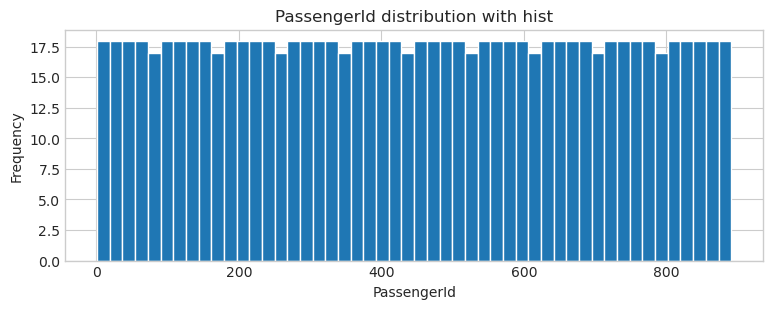

In [165]:
numericVar = ["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id = "6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSb - Survived
* Parch - Survived

In [166]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [167]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [168]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [169]:
# SibSp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<a id = "7"></a><br>
# Outlier Detection

In [170]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 - outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers
        



In [171]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [172]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]), axis = 0).reset_index(drop = True)

<a id = "8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [173]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop = True)

In [174]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "9"></a><br>
## Find Missing Value

In [175]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [176]:
train_df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            243
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          864
Embarked         2
dtype: int64

<a id = "10"></a><br>
## Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1

In [177]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
633,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


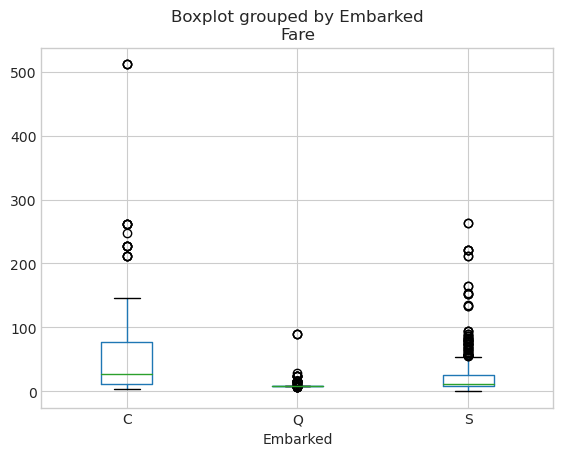

In [178]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [179]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [180]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
830,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [181]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [182]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"></a><br>
# Visualization

<a id = "12"></a><br>
##  Correlation Matris

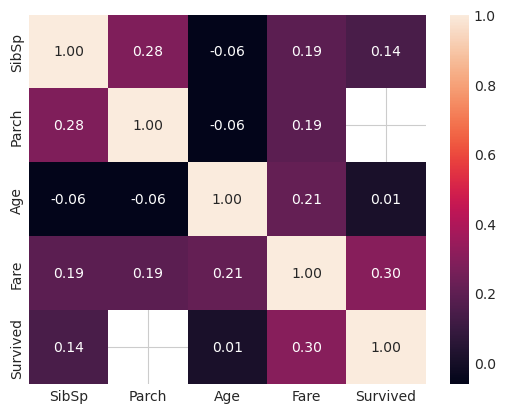

In [183]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

<a id = "13"></a><br>
## Sibsp -- Survived

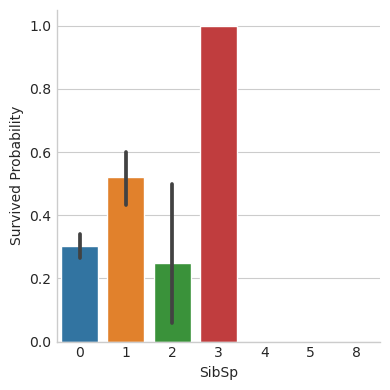

In [184]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", height=4)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "14"></a><br>
## Parch -- Survived

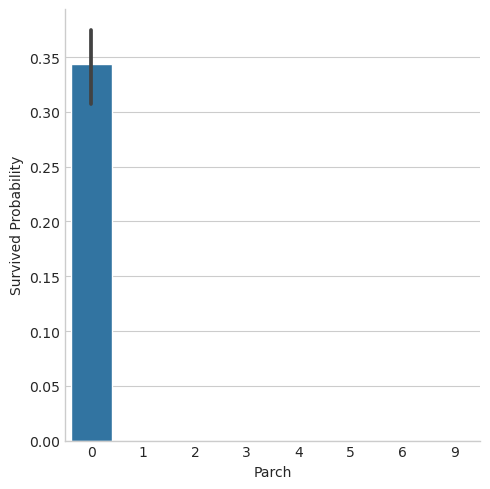

In [185]:
g = sns.catplot(x = "Parch", y = "Survived", data = train_df, kind = "bar", height=5)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "15"></a><br>
## Pclass -- Survived

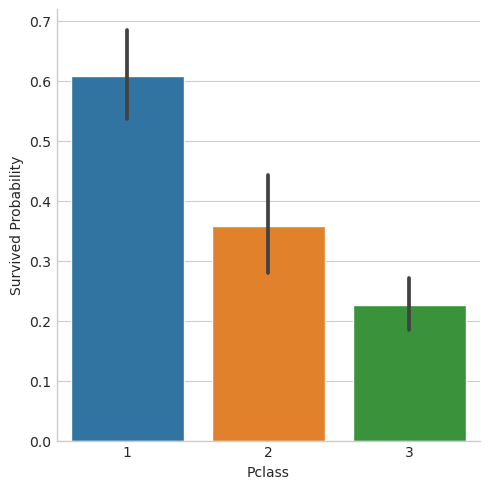

In [186]:
g = sns.catplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", height=5)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "16"></a><br>
## Age -- Survived

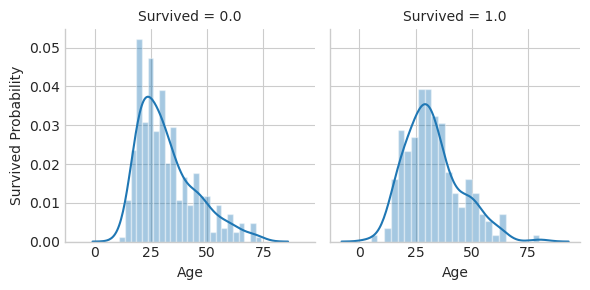

In [187]:
g = sns.FacetGrid(train_df, col = "Survived")
g.set_ylabels("Survived Probability")
g.map(sns.distplot, "Age", bins=25)
plt.show()

<a id = "17"></a><br>
## Pclass -- Age -- Survived

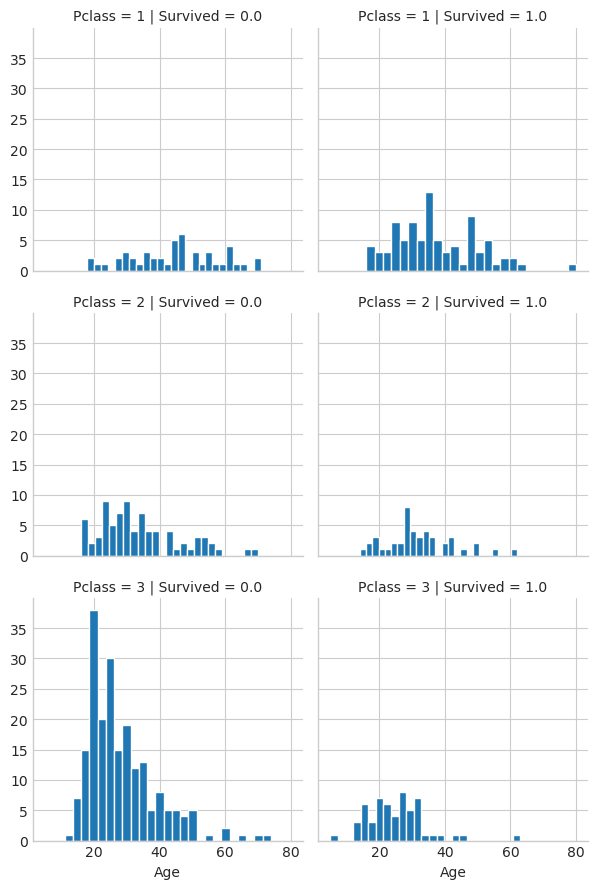

In [188]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

* pclass is important for model training

<a id = "18"></a><br>
## Embarked -- Sex -- Pclass -- Survived

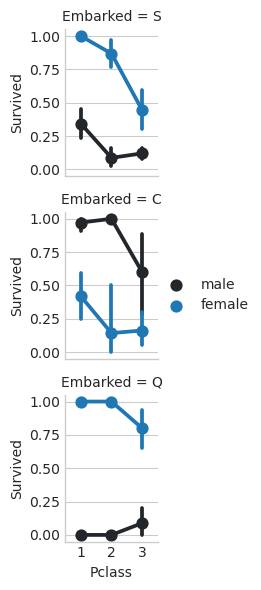

In [189]:
g = sns.FacetGrid(train_df, row="Embarked",height=2)
g.map(sns.pointplot, "Pclass", "Survived","Sex")
g.add_legend()
plt.show()


* Female passengers have much better survival rate than males.
* Males have better survival rate in pclass 3 C.
* Embarked and sex will be used in training.

<a id = "19"></a><br>
## Embarked -- Sex -- Fare -- Survived

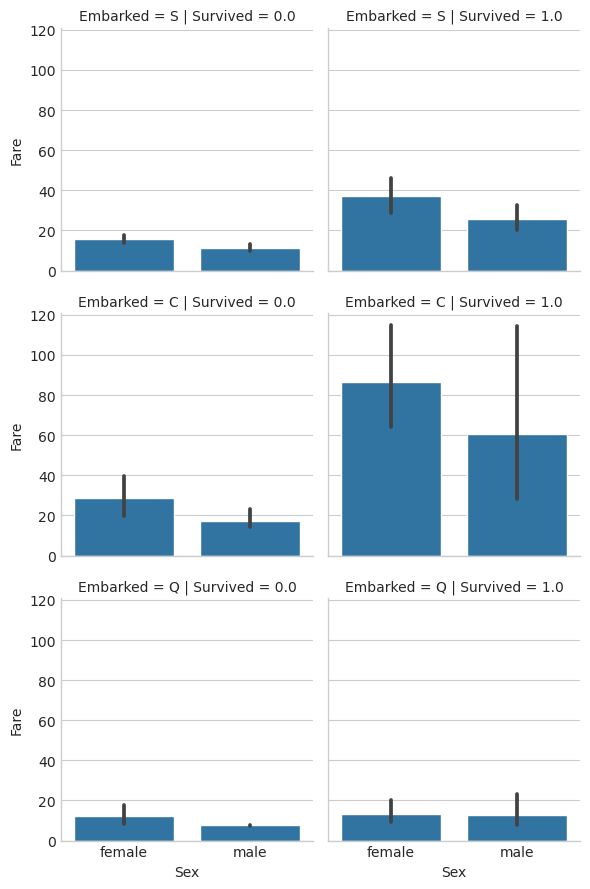

In [190]:
g = sns.FacetGrid(train_df, row="Embarked", col="Survived",height=3)
g.map(sns.barplot, "Sex", "Fare")
plt.show()

* Passengers who pay higher fare have better survival.
* Fare can be used as categorical for training.


<a id = "20"></a><br>
## Fill Missing: Age Feature

In [191]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
12,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
14,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
19,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
20,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1088,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1091,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1094,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


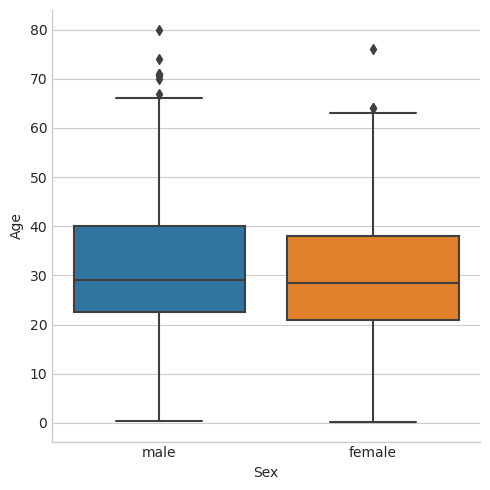

In [192]:
sns.catplot(x="Sex", y="Age", data = train_df, kind="box")
plt.show()

* Sex is not informative for age prediction, age distribution seems to be same.

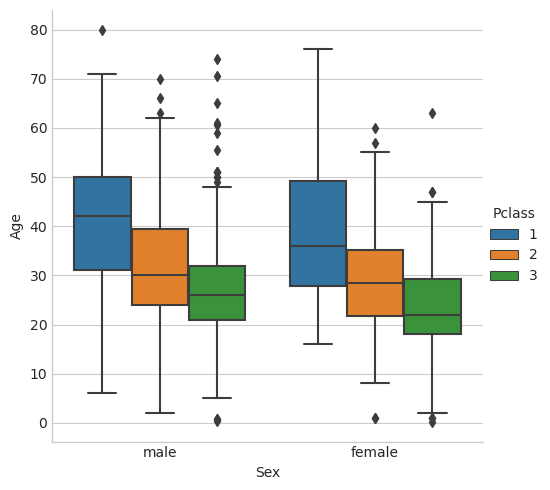

In [193]:
sns.catplot(x="Sex", y="Age", hue="Pclass" , data = train_df, kind="box")
plt.show()

* 1st class passengers are older than 2nd class and 2nd class passengers are older than 3rd class. 

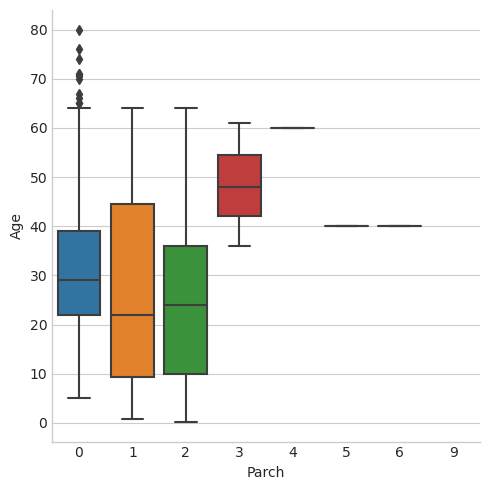

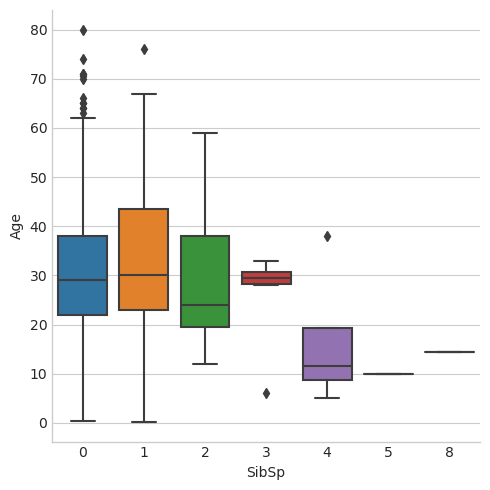

In [194]:
sns.catplot(x="Parch", y="Age", data = train_df, kind="box")
sns.catplot(x="SibSp", y="Age", data = train_df, kind="box")
plt.show()

In [195]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

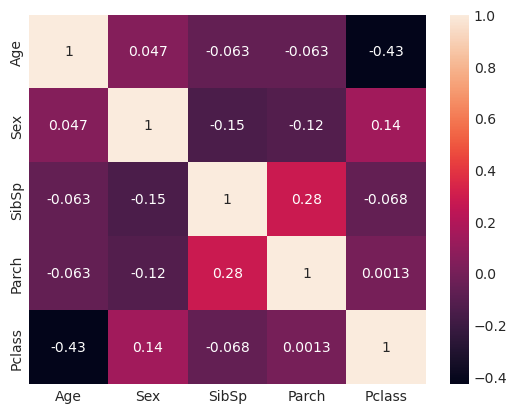

In [196]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

* Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [197]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df.loc[((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"])), "Age"].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df.loc[i, "Age"] = age_pred
    else:
        train_df.loc[i, "Age"] = age_med
        

In [198]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [199]:
age_pred

7.0

<a id = "21"></a><br>
# Feature Engineering

<a id = "22"></a><br>
## Name -- Title

In [200]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                  Nasser, Mrs. Nicholas (Adele Achem)
8                             Bonnell, Miss. Elizabeth
9                       Saundercock, Mr. William Henry
Name: Name, dtype: object

In [201]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [202]:
train_df["Title"].head(10)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
6      Mr
7     Mrs
8    Miss
9      Mr
Name: Title, dtype: object

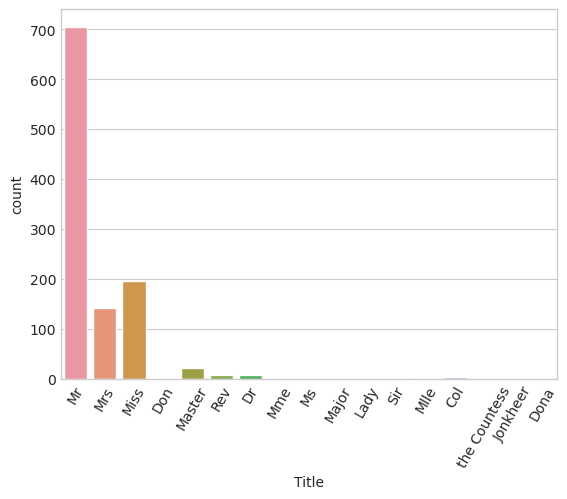

In [203]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [204]:
# convert to cetagorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     1
8     1
9     2
10    1
11    1
12    2
13    1
14    1
15    2
16    2
17    1
18    2
19    2
Name: Title, dtype: int64

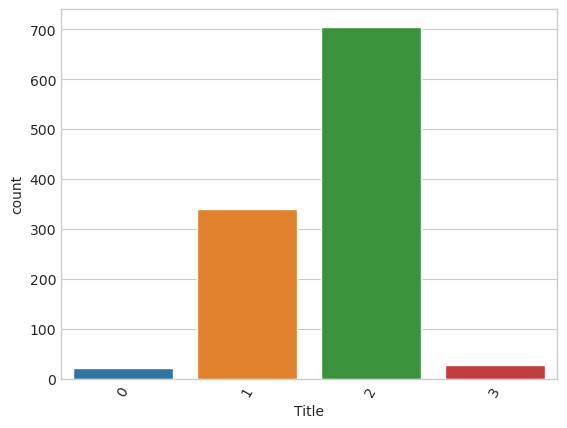

In [205]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

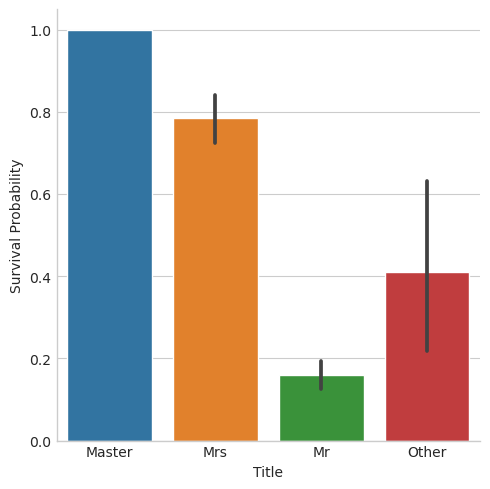

In [206]:
g = sns.catplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [207]:
train_df.drop(labels=["Name"], axis=1,inplace=True)


In [208]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [209]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


<a id = "23"></a><br>
## Family Size

In [210]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [211]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [212]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


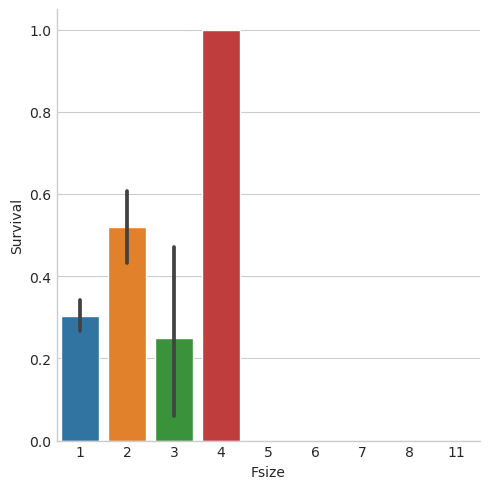

In [213]:
g = sns.catplot(x = "Fsize", y= "Survived", data = train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [214]:
train_df["Family_size"] = [1 if i < 3 else 0 for i in train_df["Fsize"]]

In [215]:
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1
8,12,1.0,1,0,58.0,0,0,113783,26.5500,C103,S,0,1,0,0,1,1
9,13,0.0,3,1,20.0,0,0,A/5. 2151,8.0500,NaN,S,0,0,1,0,1,1


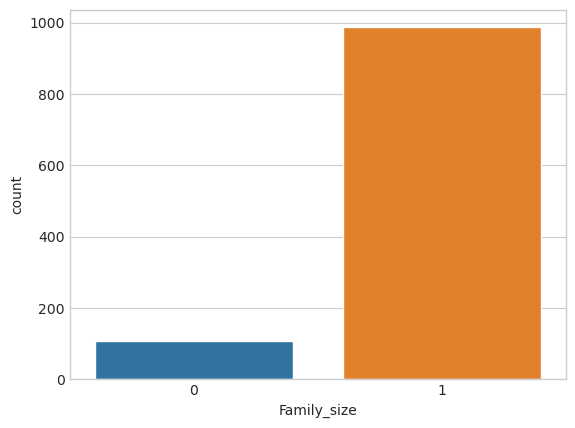

In [216]:
sns.countplot(x="Family_size", data=train_df)
plt.show()

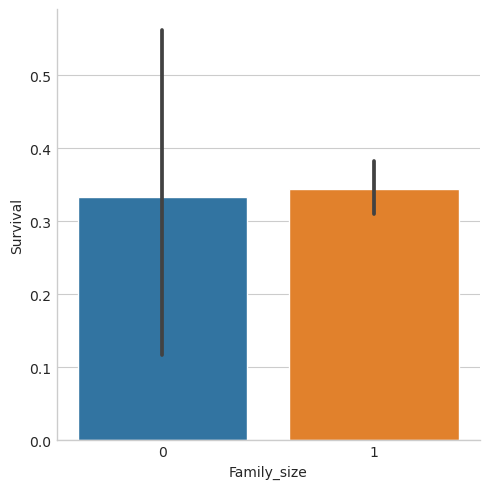

In [217]:
g = sns.catplot(x = "Family_size", y= "Survived", data = train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [218]:
train_df = pd.get_dummies(train_df,columns=["Family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id = "24"></a><br>
## Embarked

In [219]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

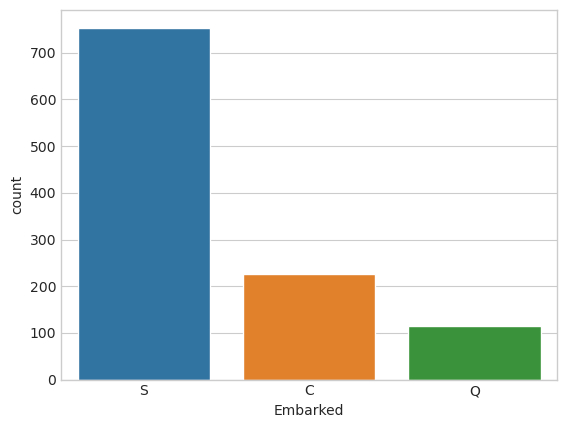

In [220]:
sns.countplot(x="Embarked", data = train_df)
plt.show()

In [221]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


<a id = "25"></a><br>
## Ticket

In [222]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               237736
8               113783
9            A/5. 2151
10              350406
11              248706
12              244373
13              345763
14                2649
15              239865
16              248698
17              330923
18              113788
19                2631
Name: Ticket, dtype: object

In [230]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]


'A5'

In [232]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [233]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9         A5
10         x
11         x
12         x
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [234]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,x,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [235]:
train_df= pd.get_dummies(train_df, columns=["Ticket"], prefix = "T")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id = "26"></a><br>
## Pclass

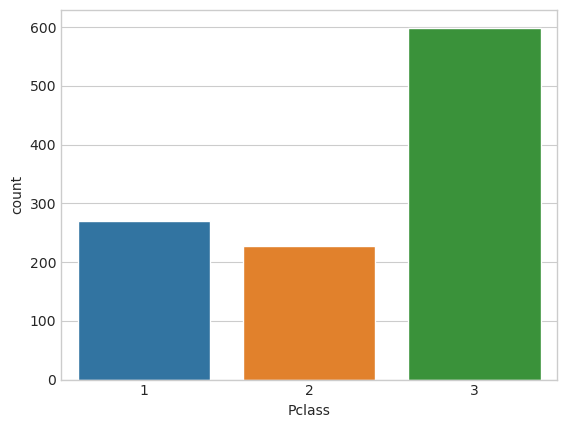

In [238]:
sns.countplot(x = "Pclass", data=train_df)
plt.show()

In [239]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id = "27"></a><br>
## Sex

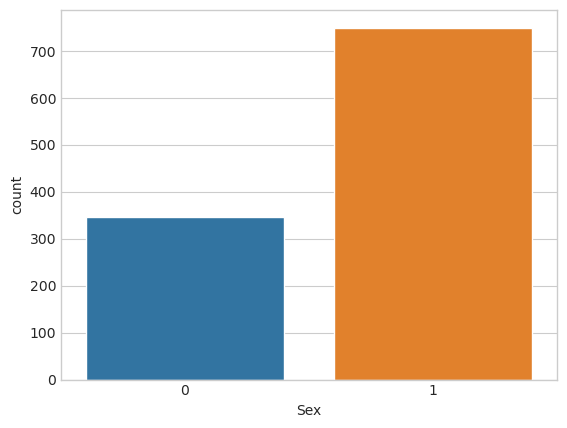

In [241]:
sns.countplot(x="Sex", data=train_df)
plt.show()

In [242]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "28"></a><br>
## Drop Passenger ID and Cabin

In [243]:
train_df.drop(labels=["PassengerId", "Cabin"], axis = 1, inplace = True)

In [244]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'Family_size_0', 'Family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

<a id = "29"></a><br>
# Modeling

In [245]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id = "30"></a><br>
## Train Test Split

In [246]:
train_df_len

678

In [247]:
test = train_df[train_df_len:]
test.drop(labels=["Survived"], axis=1, inplace=True)

In [248]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
678,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
679,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
680,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
681,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
682,22.0,1,1,12.2875,0,1,0,0,3,1,...,0,0,0,0,1,0,0,1,1,0


In [250]:
train = train_df[:train_df_len]
x_train=train.drop(labels="Survived",axis=1)
y_train=train["Survived"]
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.33, random_state=42)
print("x_train", len(x_train))
print("x_test", len(x_test))
print("y_train", len(y_train))
print("y_test", len(y_test))
print("test", len(test))

x_train 454
x_test 224
y_train 454
y_test 224
test 418


<a id = "31"></a><br>
## Simple Logistic Regression

In [251]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
acc_log_train = round(logreg.score(x_train,y_train)*100,2)
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy : % {}".format(acc_log_train))
print("Testing Accuracy : % {}".format(acc_log_test))

Training Accuracy : % 82.16
Testing Accuracy : % 83.04


<a id = "32"></a><br>
## Hyperparameter Tuning -- Grid Search -- Cross Validation

In [268]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
              SVC(random_state = random_state),
              RandomForestClassifier(random_state = random_state),
              LogisticRegression(random_state = random_state),
              KNeighborsClassifier()]
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth" : range(1,20,2)}
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma" : [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}
rf_param_grid = {"max_features" : [1,3,10],
                "min_samples_split" : [2,3,10],
                "min_samples_leaf" : [1,3,10],
                "bootstrap" : [False],
                "n_estimators" : [100,300],
                "criterion" : ["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty":["l1","l2"]}

knn_param_grid = {"n_neighbors":np.linspace(1,19,10, dtype=int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]


In [272]:
cv_results = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1, verbose = 1)
    clf.fit(x_train, y_train)
    cv_results.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_results[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8282608695652174
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8015942028985508
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8326086956521739
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8194202898550724
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7928985507246377


Text(0.5, 1.0, 'Cross Validation Scores')

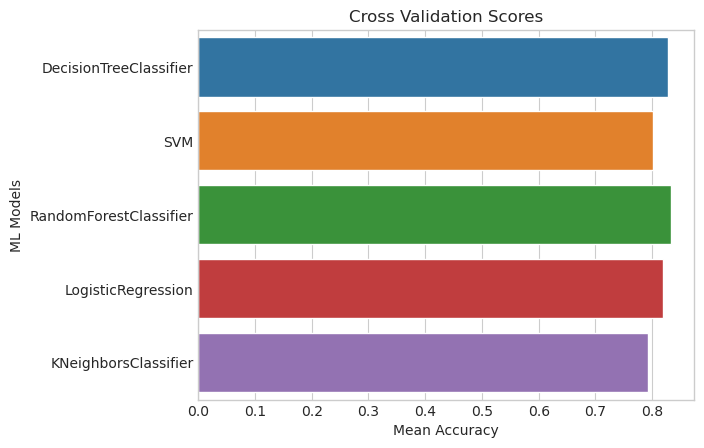

In [282]:
cv_result = pd.DataFrame({"Cross Validation Means" :cv_results, "ML Models" : ["DecisionTreeClassifier","SVM","RandomForestClassifier",
              "LogisticRegression",
              "KNeighborsClassifier"]})
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_result)
g.set_xlabel("Mean Accuracy")
g.set_ylabel("ML Models")
g.set_title("Cross Validation Scores")

<a id = "33"></a><br>
## Ensemble Modeling

In [284]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train,y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.8035714285714286


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a id = "34"></a><br>
## Prediction and Submission

In [285]:
test_survived = pd.Series(votingC.predict(test), name="Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived], axis=1)
results.to_csv("titanic.csv", index = False)

## 

<a id = "9"></a><br>
